In [1]:
include("../src/Julia.jl")

parseCPPData (generic function with 1 method)

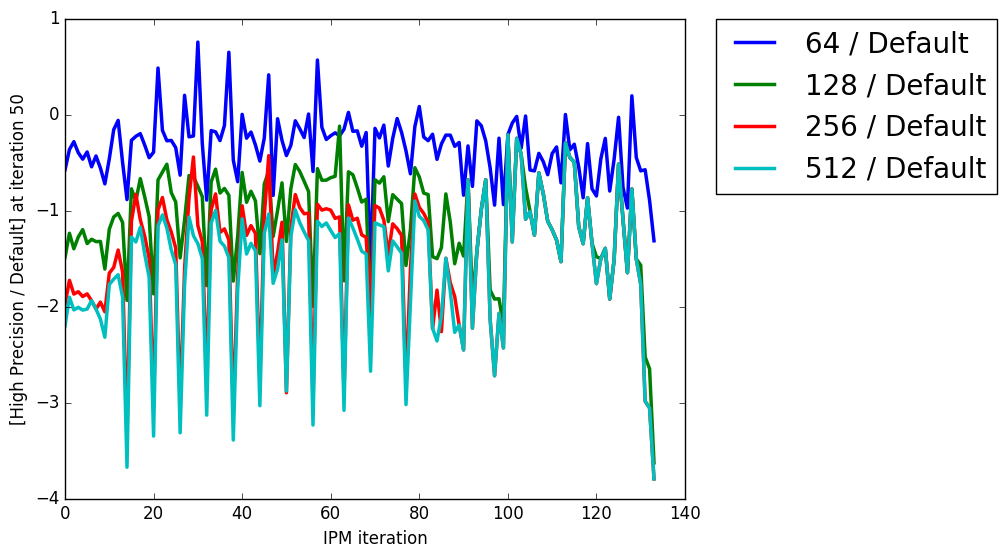

In [3]:
data = []

for pcgIter in [50]
    ipmFolder = "../../graphs/ipm_grid3_8000_all/"
    allGraphs = readdir(ipmFolder)
    
    ipmIter = 0
    data = [Array{Float64,1}(0) for i in 1:5] # a column for each precision
    while true
        try
            ipmIter = ipmIter + 1
            defaultName = ipmFolder * "ipm_grid3_8000_$(ipmIter)/" * "_log_julia_tree1_default.txt"
            defaultNorm = parseData(defaultName, only2=true)
            default = defaultNorm[pcgIter]
            
            ind = 0
            for precision in [64, 128, 256, 512, 1024]
                logName = ipmFolder * "ipm_grid3_8000_$(ipmIter)/" * "_log_julia_tree1_$(precision).txt"
                norm = parseData(logName, only2=true)
                
                ind = ind + 1
                push!(data[ind], norm[pcgIter] / default)
            end
            
#             println("finished step ", ipmIter)
        catch
            # we aggregated all the graphs
            break
        end
    end
    
    for i in 1:4
        plot(log(data[i]), label="$(2^(i+5)) / Default", linewidth=2.5)
    end
#     legend(fontsize=7)
    
    if pcgIter == 50
        legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
    end
    ylabel("[High Precision / Default] at iteration $(pcgIter)")
    xlabel("IPM iteration")
    
#     savefig("/Users/serbanstan/Dropbox/treePCGpaper/IPMpcgiter=$(pcgIter).png")
    
#     PyPlot.clf()
end